In [119]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.io import loadmat
from sklearn import svm
%matplotlib inline
sns.set()
sns.set_style('white')
#warnings.filterwarnings('ignore')

In [120]:
data1 = loadmat('ex6data1')
x1, y1 = data1['X'], data1['y']
positive1 = np.array(list(x1[number] for number in range(x1.shape[0]) if y1[number] == 1))
negative1 = np.array(list(x1[number] for number in range(x1.shape[0]) if y1[number] == 0))

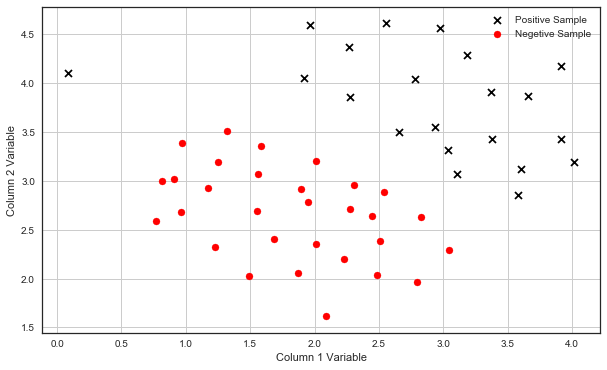

In [121]:
def plotData(positive, negative):
    plt.figure(figsize=(10, 6))
    plt.scatter(positive[:, 0], positive[:, 1], marker = 'x', label = 'Positive Sample', color = 'black')
    plt.scatter(negative[:, 0], negative[:, 1], marker = 'o', label = 'Negetive Sample', color = 'red')
    plt.xlabel('Column 1 Variable')
    plt.ylabel('Column 2 Variable')
    plt.legend()
    plt.grid(True)
    
plotData(positive1, negative1)

In [122]:
def plotBoundary(my_svm, xmin, xmax, ymin, ymax):
    xvals = np.linspace(xmin, xmax, 100)
    yvals = np.linspace(ymin, ymax, 100)
    zvals = np.zeros((len(xvals), len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            zvals[i][j] = my_svm.predict(np.array([xvals[i], yvals[j]]).reshape(1, -1))
    zvals = zvals.transpose()

    mycontour = plt.contour(xvals, yvals, zvals, [0])
    plt.title("Decision Boundary")

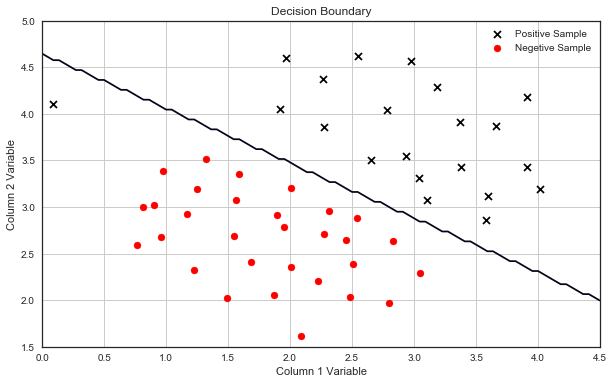

In [123]:
linearSVM = svm.LinearSVC(C = 1)
linearSVM.fit(x1, y1.flatten())
plotData(positive1, negative1)
plotBoundary(linearSVM,0,4.5,1.5,5)

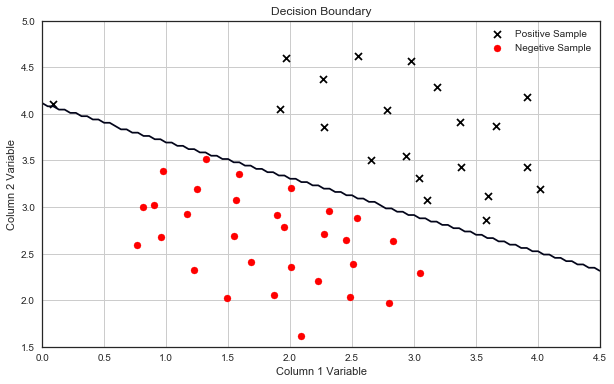

In [124]:
linearSVM = svm.LinearSVC(C = 100)
linearSVM.fit(x1, y1.flatten())
plotData(positive1, negative1)
plotBoundary(linearSVM, 0, 4.5, 1.5, 5)

In [125]:
def gaussianKerenl (x1, x2, sigma):
    return np.exp(-np.sum(np.square(x1 - x2)) / (2 * np.square(sigma)))

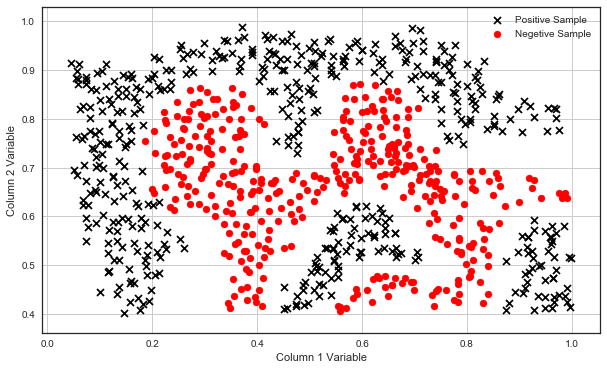

In [126]:
data2 = loadmat('ex6data2')
x2, y2 = data2['X'], data2['y']
positive2 = np.array(list(x2[number] for number in range(x2.shape[0]) if y2[number] == 1))
negative2 = np.array(list(x2[number] for number in range(x2.shape[0]) if y2[number] == 0))
plotData(positive2, negative2)

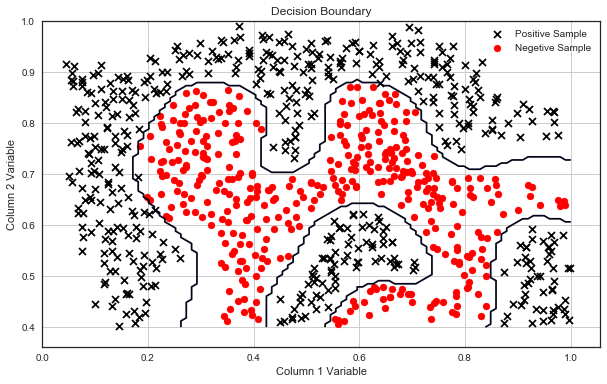

In [127]:
sigma = 0.1
gaussinSVM2 = svm.SVC(C = 20, kernel = 'rbf', gamma = 1 / np.power(sigma, 2))
gaussinSVM2.fit(x2, y2.flatten())
plotData(positive2, negative2)
plotBoundary(gaussinSVM2, 0, 1, .4, 1.0)

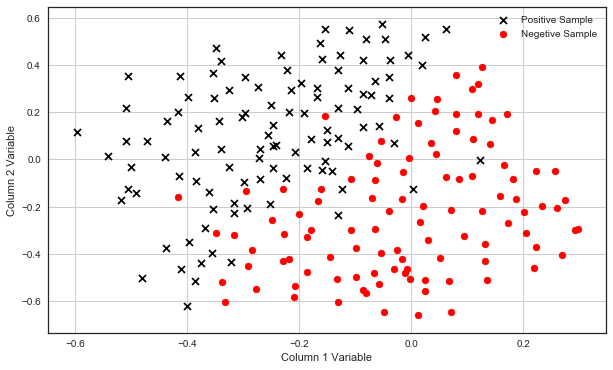

In [128]:
data3 = loadmat('ex6data3')
x3, y3 = data3['X'], data3['y']
xvalidation, yvalidation = data3['Xval'], data3['yval']
positive3 = np.array(list(x3[number] for number in range(x3.shape[0]) if y3[number] == 1))
negative3 = np.array(list(x3[number] for number in range(x3.shape[0]) if y3[number] == 0))
plotData(positive3, negative3)

In [150]:
Cvalues = (0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30)
sigmaValues = Cvalues
bestPair, bestScore = (0, 0), 0
for cvalue in Cvalues:
    for sigmavalue in sigmaValues:
        gaussinSVM3 = svm.SVC(C = cvalue, kernel = 'rbf', gamma = 1 / np.power(sigmavalue, 2))
        gaussinSVM3.fit(x3, y3.flatten())
        thisScore = gaussinSVM3.score(xvalidation, yvalidation)
        if thisScore > bestScore:
            bestScore = thisScore
            bestPair = (cvalue, sigmavalue)
            
print("Best C, sigma pair is ({}, {}) with a score of {}".format(bestPair[0], bestPair[1], best_score))

Best C, sigma pair is (0.3, 0.1) with a score of 0.965


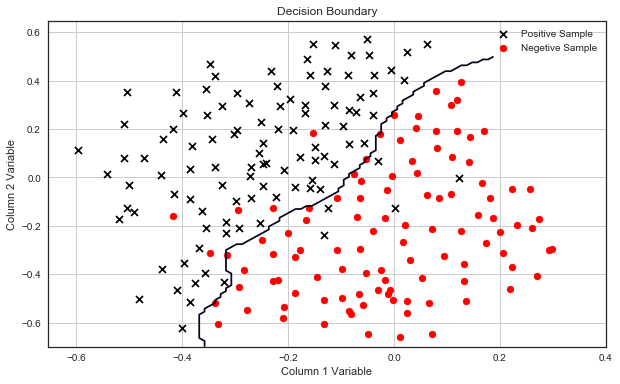

In [154]:
gaussinSVM2 = svm.SVC(C = bestPair[0], kernel = 'rbf', gamma = 1 / np.power(bestPair[1], 2))
gaussinSVM2.fit(x3, y3.flatten())
plotData(positive3, negative3)
plotBoundary(gaussinSVM2, -0.6, 0.4, -0.7, 0.5)